**Exercise No.:** 01

**Exercise Name:** Single-node Multi-operational Graph

## Task Description:

Create agraph where you pass a single list of integers along with a name and an operation. If the operation is a `+`, you add the elements and if it is a `*`, you multiply the elements, all within the same node.



**Input:** `{"name": "Johney", "data": [1,2,3,4,5,6], "operation": "+"}`

**Output:** `"Hello Johney, your answer is: 21"`

In [1]:
!pip install -q langgraph

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.9/154.9 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.2/44.2 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.0/50.0 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.5/216.5 kB 5.1 MB/s eta 0:00:00


In [4]:
from typing import List, TypedDict
from langgraph.graph import Graph, StateGraph
import math

In [13]:
class AgentState(TypedDict):
  name: str
  data: List[int]
  operation: str
  answer: str

In [22]:
def manipulate_values(state: AgentState) -> AgentState:
  """
  This function receives and manipulates multiple inputs.

  :param state: AgentState
  :return: AgentState
  """

  print("State before action:", state)

  if state["operation"] == "+":
    state["answer"] = f"Hello {state['name']}! Your answer is {sum(state['data'])}"
  elif state["operation"] == "*":
    state["answer"] = f"Hello {state['name']}! Your answer is {math.prod(state['data'])}"

  print("State after action:", state)

  return state

In [23]:
graph = StateGraph(AgentState)

graph.add_node("agent1", manipulate_values)

graph.set_entry_point("agent1")
graph.set_finish_point("agent1")

app = graph.compile()

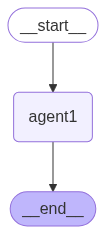

In [24]:
app

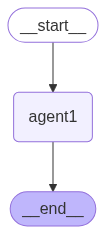

In [25]:
# Alternatively, you can display the graph as implemented below
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

**NOTE!** Remember to store your compiled graph in a variable (`app` here).

In [26]:
answers = app.invoke({"data": [1,2,3,4,5,6], "name": "Johney", "operation": "+"})

State before action: {'name': 'Johney', 'data': [1, 2, 3, 4, 5, 6], 'operation': '+'}
State after action: {'name': 'Johney', 'data': [1, 2, 3, 4, 5, 6], 'operation': '+', 'answer': 'Hello Johney! Your answer is 21'}


In [27]:
print(answers)

{'name': 'Johney', 'data': [1, 2, 3, 4, 5, 6], 'operation': '+', 'answer': 'Hello Johney! Your answer is 21'}


In [28]:
print(answers["answer"])

Hello Johney! Your answer is 21
